importing libraries and loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

cleaning


In [2]:
# Standardize column names (remove leading/trailing spaces)
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Concatenate both datasets
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
# Clean and preprocess
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'], errors='coerce')
df = df.dropna(subset=['Estimated Unemployment Rate (%)'])

eda

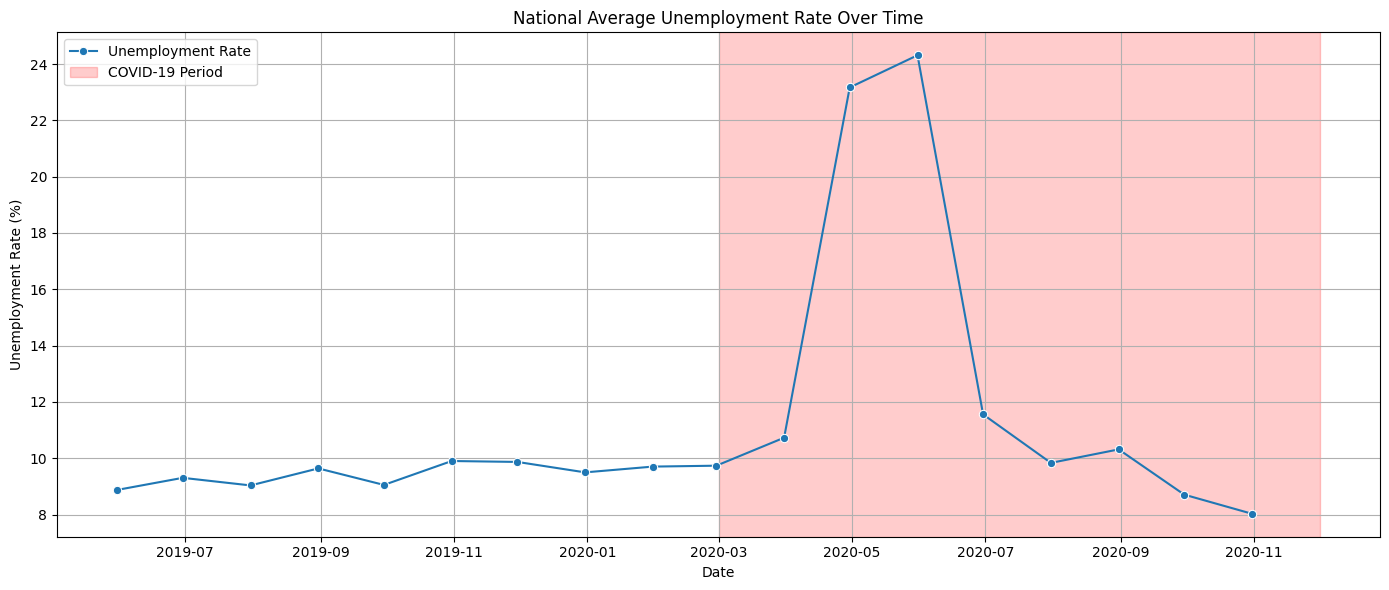

In [4]:
# NATIONAL AVERAGE UNEMPLOYMENT TREND
national_avg = df.groupby('Date')["Estimated Unemployment Rate (%)"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=national_avg, x='Date', y='Estimated Unemployment Rate (%)', marker='o', label='Unemployment Rate')
plt.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2020-12-01"), color='red', alpha=0.2, label='COVID-19 Period')
plt.title("National Average Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-5-114886085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="coolwarm")


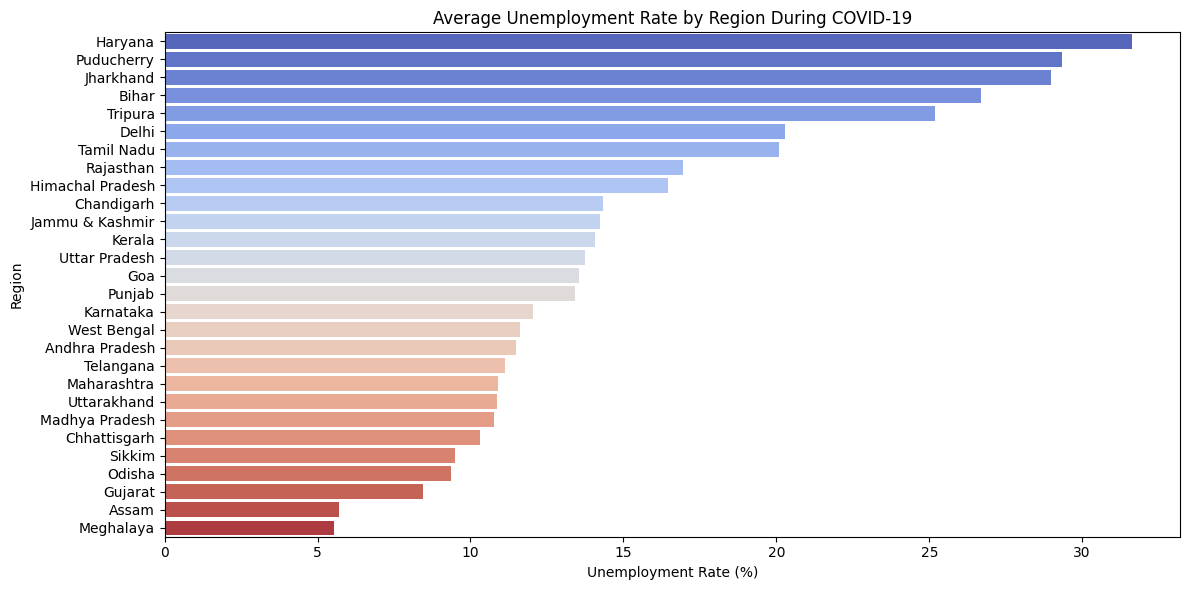

In [5]:
# REGION-WISE UNEMPLOYMENT TRENDS DURING COVID
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-12-01')]
region_avg = covid_period.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette="coolwarm")
plt.title("Average Unemployment Rate by Region During COVID-19")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

/tmp/ipython-input-6-296947468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.loc[month_order].index, y=monthly_avg.loc[month_order].values, palette='viridis')


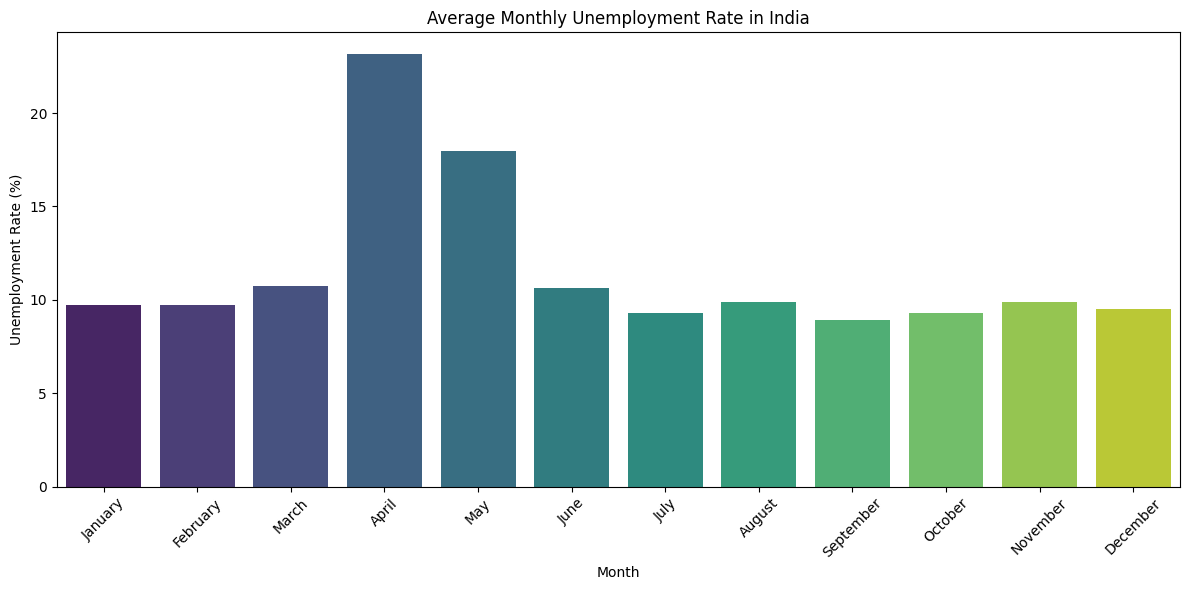

In [6]:
# SEASONAL TREND ANALYSIS
df['Month'] = df['Date'].dt.month_name()
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg.loc[month_order].index, y=monthly_avg.loc[month_order].values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Monthly Unemployment Rate in India")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [7]:
# POLICY INSIGHT (basic print)
print("\nPolicy Insight:")
print("→ A visible spike in unemployment is observed during COVID-19, especially from March to May 2020.")
print("→ Some regions experienced sharper rises, indicating need for region-specific recovery policies.")
print("→ Seasonal trends suggest slight increases around monsoon months, indicating agricultural dependence.")


Policy Insight:
→ A visible spike in unemployment is observed during COVID-19, especially from March to May 2020.
→ Some regions experienced sharper rises, indicating need for region-specific recovery policies.
→ Seasonal trends suggest slight increases around monsoon months, indicating agricultural dependence.


/tmp/ipython-input-8-1714635111.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_avg = df.groupby('Period')['Estimated Unemployment Rate (%)'].mean()
/tmp/ipython-input-8-1714635111.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=period_avg.index, y=period_avg.values, palette='Set2')


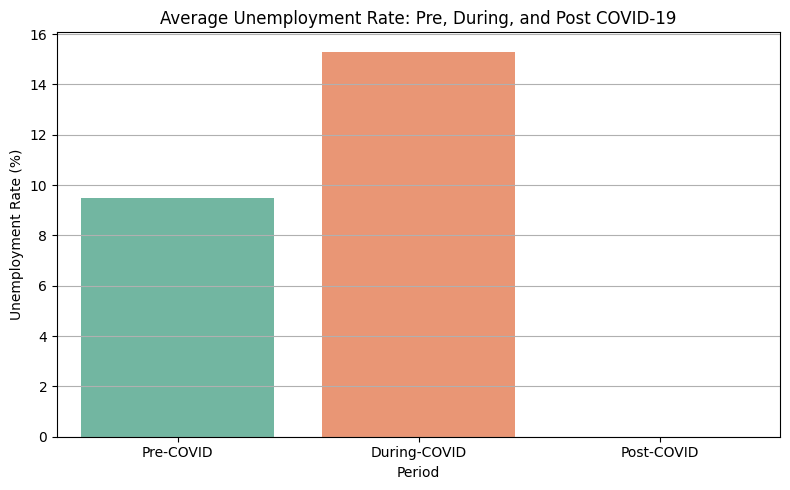

In [8]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df = pd.concat([df1, df2], ignore_index=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'], errors='coerce')
df = df.dropna(subset=['Estimated Unemployment Rate (%)'])

# Define periods
df['Period'] = pd.cut(df['Date'],
                      bins=[pd.Timestamp('2019-01-01'), pd.Timestamp('2020-02-29'),
                            pd.Timestamp('2020-12-31'), pd.Timestamp('2021-12-31')],
                      labels=['Pre-COVID', 'During-COVID', 'Post-COVID'],
                      include_lowest=True)

# Group and plot
period_avg = df.groupby('Period')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=period_avg.index, y=period_avg.values, palette='Set2')
plt.title("Average Unemployment Rate: Pre, During, and Post COVID-19")
plt.xlabel("Period")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

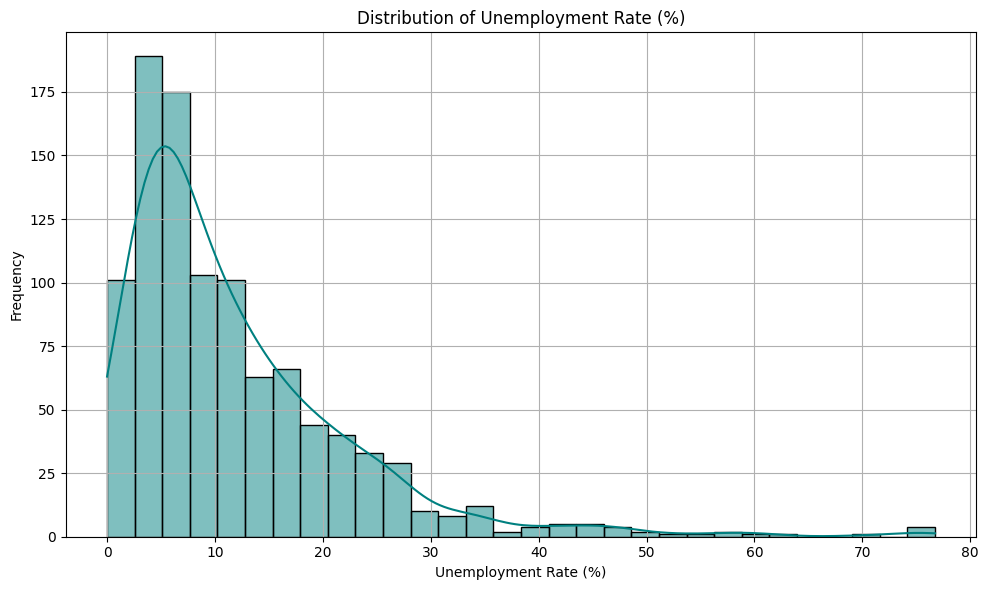

In [11]:
# 1. Distribution of Unemployment Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=30, kde=True, color='teal')
plt.title("Distribution of Unemployment Rate (%)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

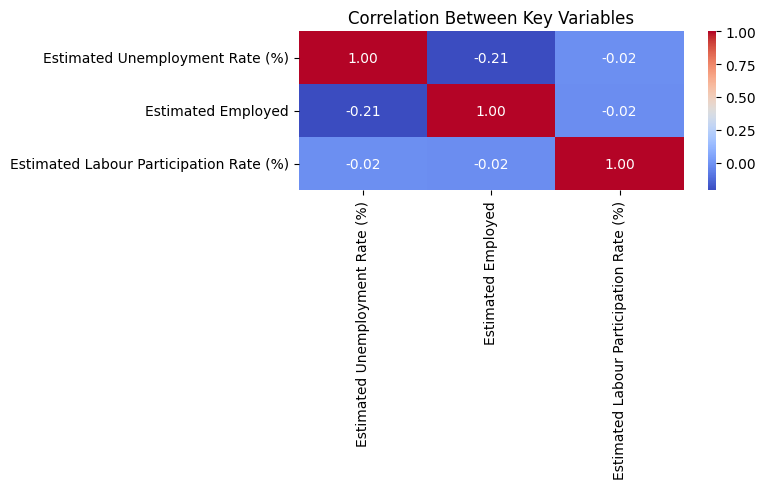

In [12]:

# 2. Correlation Heatmap
corr_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Key Variables")
plt.tight_layout()
plt.show()

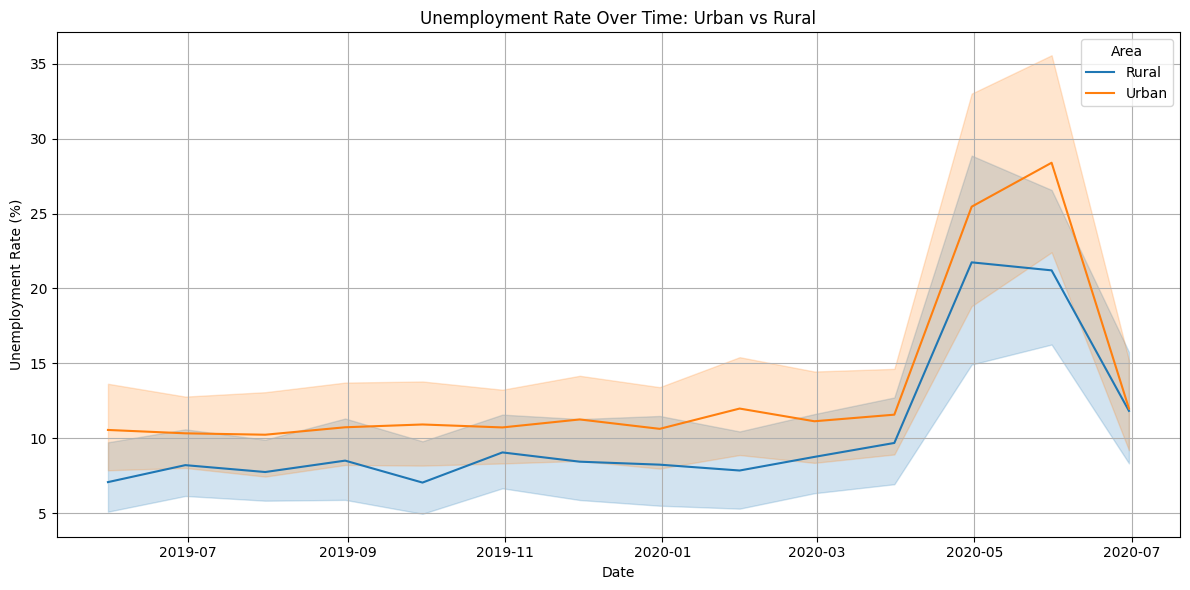

In [13]:
# 3. Unemployment Trend by Area (Urban vs Rural)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title("Unemployment Rate Over Time: Urban vs Rural")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

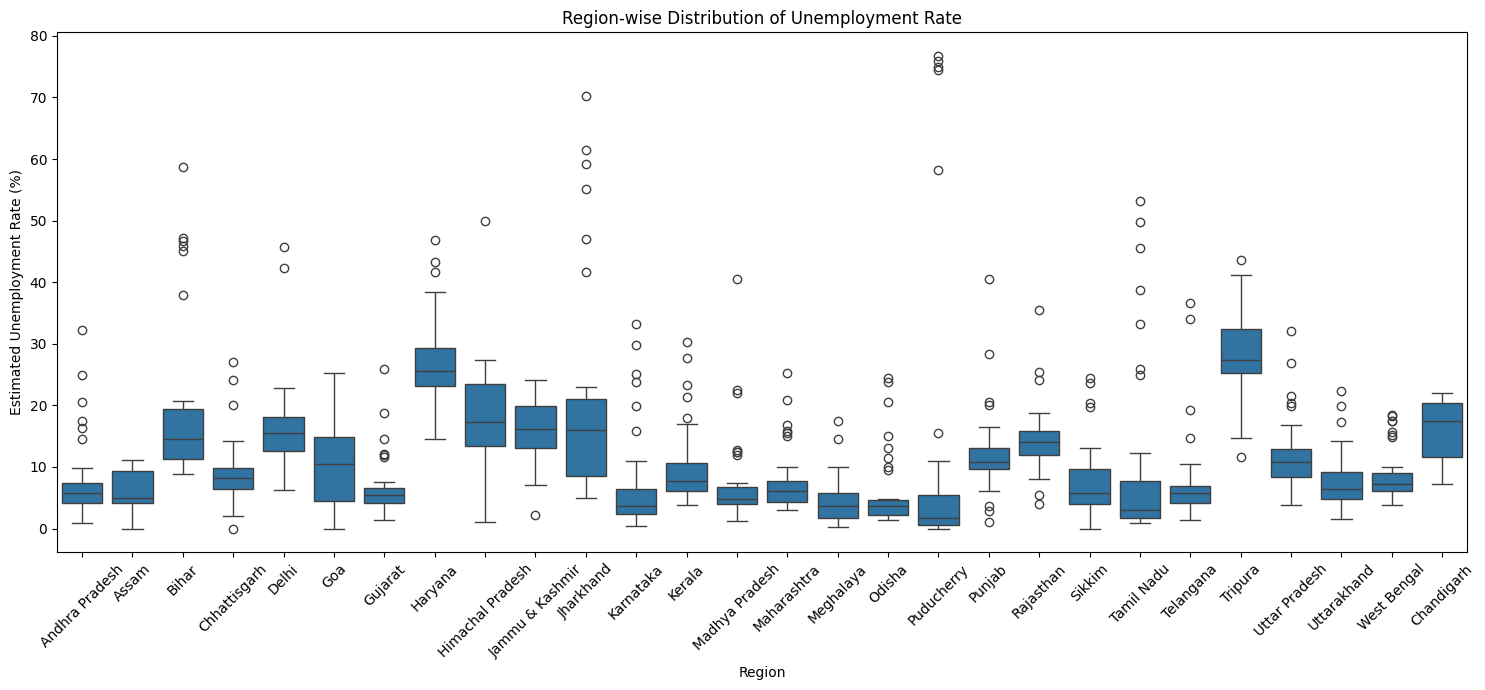

In [14]:
# 4. Boxplot by Region
plt.figure(figsize=(15, 7))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Region-wise Distribution of Unemployment Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

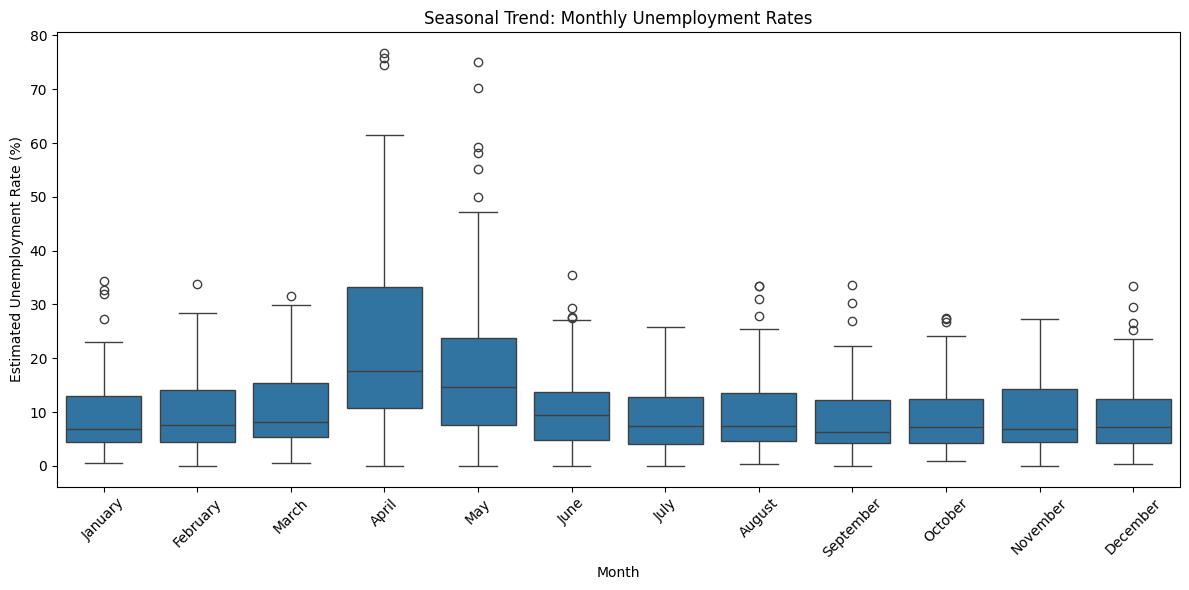

In [15]:
# 5. Monthly Trend (Seasonality)
df['Month'] = df['Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Estimated Unemployment Rate (%)', data=df, order=month_order)
plt.xticks(rotation=45)
plt.title("Seasonal Trend: Monthly Unemployment Rates")
plt.tight_layout()
plt.show()

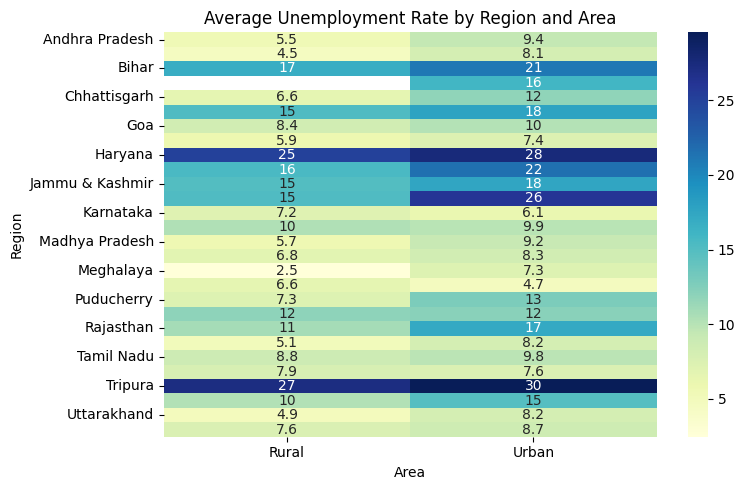

In [16]:
# 6. Region-Area Level Average Heatmap
pivot_table = df.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='Area', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title("Average Unemployment Rate by Region and Area")
plt.tight_layout()
plt.show()
